Determining the Critical Temperature of Bi-2223

Regarding the demonstration of zero resistivity, we used liquid nitrogen as a cooling agent, the four-point measurement technique, and Bi-2223 as the high-temperature superconductor. By pouring a sufficient level of liquid nitrogen into a styrofoam container holding a Bi-2223 piece, we steadily cooled the sample from 300 K to 77 K and warmed it back up to room temperature. Using a four-point technique involving two copper pins as current leads and two pins to measure voltage, we were able to measure the resistance of the superconductor as a function of temperature and observe the resistivity dropping suddenly to zero past the critical temperature of Bi-2223. The measurements taken as the sample was warming are more accurate since they only depend on the thermal conductivity of the styrofoam
box.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_raw_data(file_name, title):
    
    df = pd.read_csv(file_name, sep='\t', header = None)
    temperature = df.iloc[:, 0].astype(float)
    resistivity = df.iloc[:, 1].astype(float) 

    plt.plot(temperature, resistivity, marker='', linestyle='-')

    plt.xlabel('Temperature (K)', fontsize = 10)  
    plt.ylabel('Resistance (Ω)', fontsize = 10)
    plt.title(title, fontsize = 10)  
    plt.grid(False)  
    plt.tight_layout()
    plt.show()

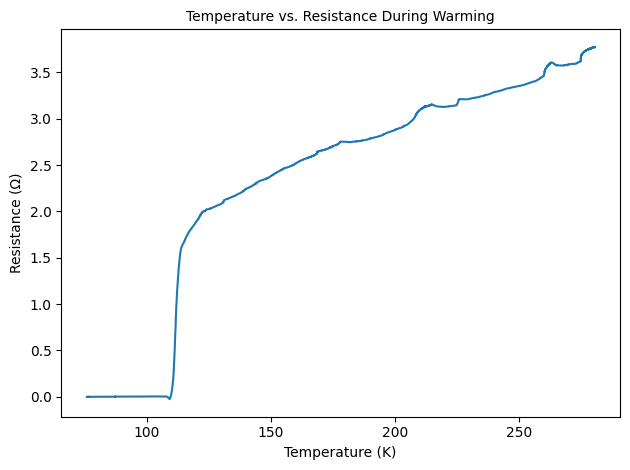

In [3]:
# Plot the raw data
file_name = 'superwarm.txt'
title = 'Temperature vs. Resistance During Warming'
plot_raw_data(file_name, title)

 It is immediately clear that there is a steep drop in resistance to zero past a temperature threshold, which we established is the "critical temperature". In order to pinpoint the value of the critical temperature of Bi-2223, we use a linear fit to the part of the curve at temperatures greater than the region within which Tc is located. We then take the tangential line resulting from this linear fit and modify it to obtain a new line at 50% of its height (resistance). Noting where our 50% line intersects with the original curve, we can take the temperature at that point as the value of Tc. In order to obtain uncertainty, we consider a 90% line and 10% line relative to the tangential line from the linear fit. The temperatures obtained from the respective intersection points between these lines and the original curve can be denoted as T_{.9} and T_{.1}. Their difference over two gives the transition width which is essentially the range within which our measurement is uncertain --- less than 3% of the critical temperature.

Linear Fit Formula: y = 0.011791x + 0.496843
Intersection Points (x, y):
(112.348781, 1.159195)
(111.499312, 0.628312)
(116.087522, 1.728752)


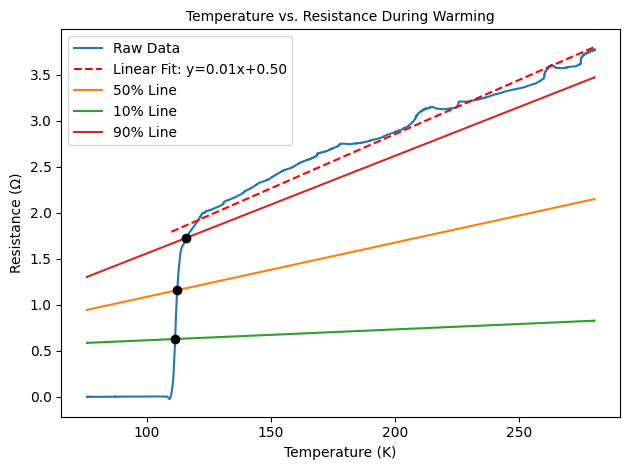

In [4]:
from scipy.stats import linregress

def plot_raw_data_with_fit(file_name, title):
    # Load the data
    df = pd.read_csv(file_name, sep='\t', header=None)
    temperature = df.iloc[:, 0].astype(float)
    resistivity = df.iloc[:, 1].astype(float)
    
     # Filter data within the specified range
    mask = (temperature >= 110) & (temperature <= 300)
    temperature_fit = temperature[mask]
    resistivity_fit = resistivity[mask]

    # Perform linear regression on the filtered data
    slope, intercept, r_value, p_value, std_err = linregress(temperature_fit, resistivity_fit)
    fit_line = slope * temperature_fit + intercept
    
    # Print the exact formula of the linear fit
    print(f"Linear Fit Formula: y = {slope:.6f}x + {intercept:.6f}")
    
    # Plot the raw data
    plt.plot(temperature, resistivity, marker='', linestyle='-', label='Raw Data')

    # Plot the linear fit for the specified range
    plt.plot(temperature_fit, fit_line, color='red', linestyle='--', 
             label=f'Linear Fit: y={slope:.2f}x+{intercept:.2f}')
    
     # Plot additional custom lines if provided
    if custom_lines:
        intersections = []
        for label, formula_function in custom_lines:
            custom_line = formula_function(temperature)
            plt.plot(temperature, custom_line, linestyle='-', label=label)
            
            # Calculate intersection points
            diff = resistivity - custom_line
            sign_changes = np.where(np.diff(np.sign(diff)))[0]  # Find indices where sign changes
            for idx in sign_changes:
                # Linear interpolation to find the exact intersection point
                x_intercept = temperature[idx] - diff[idx] * (temperature[idx + 1] - temperature[idx]) / (diff[idx + 1] - diff[idx])
                y_intercept = formula_function(x_intercept)
                intersections.append((x_intercept, y_intercept))
                plt.scatter(x_intercept, y_intercept, color='black', zorder=5)  # Mark intersection points

        print("Intersection Points (x, y):")
        for point in intersections:
            print(f"({point[0]:.6f}, {point[1]:.6f})")


    plt.xlabel('Temperature (K)', fontsize=10)
    plt.ylabel('Resistance (Ω)', fontsize=10)
    plt.title(title, fontsize=10)
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()


custom_lines = [
    ("50% Line", lambda x: 0.5*0.011791*x + 0.496843),
    ("10% Line", lambda x: 0.1*0.011791*x + 0.496843),
    ("90% Line", lambda x: 0.9*0.011791*x + 0.496843)
]

file_name = 'superwarm.txt'
title = 'Temperature vs. Resistance During Warming'
plot_raw_data_with_fit(file_name, title)

The primary result from this experiment is the determination of the critical temperature Tc of Bi-2223. We obtained a value of 112.3 +/- 2.3K which is barely consistent with the accepted value of 110K within uncertainty. Thus, we verified that Bi-2223 is a high-Tc superconductor.